<img style="float: left; margin: 30px 15px 15px 15px;" src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" width="400" height="600" /> 
    
    
## <font color='navy'> Teoría Moderna de Portafolios: Práctica
    
### <font color='navy'> Portafolios de Inversión

    Mtro. Sean Nicolás González Vázquez
    

### <font color='white'>  0.- Introducción


Como discutimos en la clase anterior, la Teoría Moderna de Portafolios, propuesta por Markowitz y Sharpe, proporciona a los inversionistas herramientas valiosas para tomar decisiones de inversión más fundamentadas y basadas en datos.

El objetivo principal de esta teoría es determinar las ponderaciones "eficientes" de un conjunto de activos dentro de un portafolio de inversión, optimizando una métrica específica, como la varianza o el ratio de Sharpe. A este proceso se le denomina:

> **Asset Allocation**: Es el proceso de decidir cuánto capital asignar a cada activo dentro de un portafolio de inversión.
    
Ahora bien, *¿cómo podemos optimizar un portafolio en Python?*

En esta clase aprenderemos a hacerlo utilizando la librería scipy, que incluye el método minimize. A continuación, se presenta el enlace a la documentación:

+ https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
    
    
Esta función requiere los siguientes parámetros clave:

+ **fun:** La función objetivo a optimizar.
+ **x0**: Las variables iniciales que se desean ajustar.
+ **bounds**: Los rangos permitidos para las variables de decisión.
+ **constraints**: Las restricciones que deben cumplir las soluciones.
+ **tol**: Tolerancia al error, por default usaremos 1e-16.
    
Con esta base y lo aprendido previamente sobre la Teoría Moderna de Portafolios, ¡comencemos!

### <font color='White'>  1.- Obtención de Datos y Métricas del Portafolio

Primero, descargaremos los precios de cierre ajustado para los siguientes activos *AAPL*, *MSFT* y *GOOG*, desde el `2021-01-01` hasta la fecha. 

Después obtendremos los rendimientos y las métricas de riesgo y rendimiento de los activos de manera individual.

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

from scipy.optimize import minimize

In [6]:
# Obtener precios
tickets = ["AAPL", "MSFT", "GOOG"]
start_date = "2021-01-01"
end_date = "2026-02-23"


prices = yf.download(tickers=tickets, start=start_date, end=end_date)["Close"]

/home/rigodev/ITESO/06/portafolios/env/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  3 of 3 completed


In [7]:
# Obtener rendimiento
returns = prices.pct_change().dropna()
returns

Ticker,AAPL,GOOG,MSFT
Date,,,
2021-01-05,0.012364,0.007337,0.000965
2021-01-06,-0.033662,-0.003234,-0.025929
2021-01-07,0.034123,0.029943,0.028457
2021-01-08,0.008631,0.011168,0.006093
2021-01-11,-0.023249,-0.022405,-0.009698
...,...,...,...
2026-02-13,-0.022733,-0.010828,-0.001294
2026-02-17,0.031668,-0.010457,-0.011113
2026-02-18,0.001781,0.003699,0.006904


In [8]:
# Obtener rendimiento promedio
mean = returns.mean()
mean * 100 * 252

Ticker
AAPL    18.400027
GOOG    30.188539
MSFT    16.037354
dtype: float64

In [9]:
# Obtener matriz de covariânza varianza
cov = returns.cov()
cov

Ticker,AAPL,GOOG,MSFT
Ticker,,,
AAPL,0.000308,0.000195,0.000175
GOOG,0.000195,0.000376,0.000198
MSFT,0.000175,0.000198,0.000271


Con solamente esta informacion, estamos listos para encontrar los portafolios eficientes.

###  2.- Portafolio Eficiente en Mínima Varianza
    
El portafolio eficiente en mínima varianza es aquel que proporciona el menor riesgo posible, dado un conjunto de activos financieros.

La idea central de este método es que es posible reducir el riesgo de un portafolio aprovechando las propiedades estadísticas de los rendimientos de los activos, específicamente sus covarianzas.
y varianzas.

Markowitz demostró que, al considerar cómo los rendimientos de una colección de activos se mueven conjuntamente (es decir, su covarianza), los inversores pueden construir un portafolio que minimice el riesgo.
    
El problema de optimización se define de la siguiente manera:
    
    
$$\min_w \sigma^2 = w^T \Sigma w$$
    
$$s.a. \hspace{0.5cm} \sum_{i=1}^n w_i= 1$$
$$ \hspace{0.8cm} w > 0 $$
    
    
Recuerda que `scipy` nos solicitará la función objetivo, los valores iniciales, las cotas, las restricciones y la tolerancia al error para realizar la optimización.

In [10]:
# Definir funcion objetivo
def varianza(w) -> float:
    return float(w.T @ cov @ w)

In [11]:
# Definir valores iniciales
n_assets = len(tickets)

w_inicial = np.ones(n_assets) / n_assets
w_inicial

array([0.33333333, 0.33333333, 0.33333333])

In [12]:
# Definir las cotas
bounds = [(0,1)] * n_assets
bounds

[(0, 1), (0, 1), (0, 1)]

In [13]:
# Definir las restricciones
def constrain1(w):
    return sum(w) - 1

In [14]:
# Definir tolerancia
tol = 1e-50 #0.00000...1

In [15]:
# Aplicar función de scipy.optimize
results = minimize(
    fun=varianza, 
    x0=w_inicial, 
    bounds=bounds, 
    constraints={"fun" : constrain1, "type" : "eq"}, 
    tol=tol)

results

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: 0.00022532060030580102
           x: [ 3.550e-01  1.601e-01  4.848e-01]
         nit: 19
         jac: [ 4.506e-04  4.506e-04  4.506e-04]
        nfev: 111
        njev: 19
 multipliers: [ 4.506e-04]

In [16]:
# Encontrar pesos eficientes 
results.x

array([0.35503575, 0.16013212, 0.48483213])

### Orden de la salida

La salida dado que se encuentra en orden alfabetico, los pesos se asignan en función de este orden

In [17]:
returns.columns

Index(['AAPL', 'GOOG', 'MSFT'], dtype='str', name='Ticker')

Es decir

In [18]:
dict(zip(returns.columns, results.x))

{'AAPL': np.float64(0.3550357465586925),
 'GOOG': np.float64(0.16013211950698567),
 'MSFT': np.float64(0.48483213393432173)}

In [19]:
w_min_var = results.x
w_min_var

array([0.35503575, 0.16013212, 0.48483213])

¡Perfecto!, ahora obtengamos las métricas de rendimiento y riesgo de este portafolio de inversion

In [50]:
# Obtener rendimiento del portafolio
R_min_var = mean @ w_min_var 

In [51]:
# Obtener volatilidad del portafolio
vol_min_var = np.sqrt(w_min_var.T @ cov @ w_min_var)

¿Parece sencillo, verdad? Aunque la implementación básica es bastante directa, imagina que quisieras optimizar múltiples portafolios. Para este tipo de escenarios, es más eficiente generar funciones de Python. Recordemos que la estructura básica para definir una función en Python es la siguiente:

def nombre_de_función(parámetro_1, ..., parámetro_n):

        ... code ...
        ... code ...
        
        return result
        
**Ejercicio:** Con esta información, crea una función llamada `opt_min_var`que reciba los rendimientos de los activos y retorne los pesos eficientes en mínima varianza.

In [34]:
# Programar funcion
def opt_min_var(returns: pd.DataFrame) -> np.ndarray:
    # Input
    cov = returns.cov()
    n_assets = len(returns.columns)
    
    # Función objetivo
    var = lambda w: w.T @ cov @ w
    
    # Restricciones 
    rest = lambda w: sum(w) -1
    
    # Pesos iniciales
    weight = np.ones(n_assets) / n_assets 
    
    # Bounds
    bounds = [(0,1)] * n_assets
    
    # Tol
    tol = 1e-50
    
    opt = minimize(
        fun = var,
        x0=weight,
        bounds=bounds,
        constraints= {"fun" : rest, "type" : "eq"},
        tol = tol
    )
    
    print(opt)
    
    return opt.x

In [35]:
# Verificar resultados de la función
opt_min_var(returns=returns)

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: 0.00022532060030580102
           x: [ 3.550e-01  1.601e-01  4.848e-01]
         nit: 19
         jac: [ 4.506e-04  4.506e-04  4.506e-04]
        nfev: 111
        njev: 19
 multipliers: [ 4.506e-04]


array([0.35503575, 0.16013212, 0.48483213])

### 3.- Portafolio Eficiente en Máximo de Sharpe

El portafolio eficiente en máximo Sharpe es aquel que maximiza la relación entre retorno y riesgo.

Esta relación se mide a través del ratio de Sharpe, que es el ratio entre el retorno en exceso a la tasa
libre de riesgo y el riesgo.

$$\max_w \hspace{0.1 cm} RS = \frac{\mu - r_f}{\sigma} = \frac{w^T \bar{r} - r_f}{\sqrt{w^T \Sigma w}}$$
    
$$s.a. \hspace{0.5cm} \sum_{i=1}^n w_i= 1$$
$$ \hspace{0.8cm} w > 0 $$
    
La tasa libre de riesgo es una referencia clave en el ámbito financiero y generalmente es conocida de antemano por el gestor de inversiones, ya que el banco central del país de referencia la publica regularmente.

Por ejemplo, la tasa de Banxico la puedes encontrar en https://www.banxico.org.mx/, y la tasa del Banco Central Americano en https://www.federalreserve.gov/releases/h15/#:~:text=As%20of%20March%201,%202016,%20the%20daily%20effective%20federal%20funds.
    
Escribe ahora una función llamada `opt_max_sharpe` que obtenga los pesos eficientes en máximo de sharpe para tu portafolio, esta recibirá los rendimientos y la tasa libre de riesgo, deberá retornar los pesos.

In [ ]:
# Programar funcion

def opt_max_sharpe(returns: pd.DataFrame, risk_free : float):
    cov = returns.cov()
    n_assets = len(returns.columns)
    means = returns.mean()
    
    # Función objetivo
    sharpe = lambda w: (-1)*((sum(w * means) - risk_free)/(np.sqrt(w.T @ cov @ w)))
    
    # Restricciones 
    rest = lambda w: sum(w) -1
    
    # Pesos iniciales
    weight = np.ones(n_assets) / n_assets 
    
    # Bounds
    bounds = [(0,1)] * n_assets
    
    # Tol
    tol = 1e-50
    
    opt = minimize(
        fun = sharpe,
        x0=weight,
        bounds=bounds,
        constraints= {"fun" : rest, "type" : "eq"},
        tol = tol
    )
    
    print(opt)
    
    return opt.x

In [38]:
riskfree = 0.0361
w_max_sharp = opt_max_sharpe(returns, risk_free = riskfree/252)
w_max_sharp

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -0.05446291077181779
           x: [ 6.863e-02  9.314e-01  8.734e-28]
         nit: 21
         jac: [-7.630e-03 -7.630e-03 -3.541e-03]
        nfev: 154
        njev: 20
 multipliers: [-7.630e-03]


array([6.86348165e-02, 9.31365184e-01, 8.73407166e-28])

In [39]:
dict(zip(returns.columns, w_max_sharp))

{'AAPL': np.float64(0.068634816467113),
 'GOOG': np.float64(0.9313651835328871),
 'MSFT': np.float64(8.734071660860646e-28)}

In [40]:
dict(zip(returns.columns, w_min_var))

{'AAPL': np.float64(0.3550357465586925),
 'GOOG': np.float64(0.16013211950698567),
 'MSFT': np.float64(0.48483213393432173)}

¡Bien hecho!, ahora encontremos las métricas de rendimiento y riesgo para el portafolio eficiente en máximo de Sharpe

In [ ]:
# Obtener rendimiento del portafolio
R_max_sharpe = sum(mean * w_max_sharp)
R_max_sharpe

0.0011658506654228017

In [43]:
# Obtener volatilidad del portafolio
vol_max_sharpe = np.sqrt(w_max_sharp.T @ cov @ w_max_sharp)
vol_max_sharpe

np.float64(0.018776019912949332)

Ahora, comparemos la volatilidad del portafolio eficiente en máximo de sharpe con el de mínima varianza. ¿Que observas? ¿Qué pasa con el rendimiento?

### 4.- Frontera Eficiente en Media Varianza
    
La frontera eficiente en media-varianza es la sección superior de la bala de Markowitz, donde se encuentran aquellos portafolios que, para un nivel de riesgo dado, ofrecen el mayor rendimiento posible.

Estos portafolios son considerados “óptimos” porque no es posible encontrar otro portafolio con el mismo nivel de riesgo que ofrezca un rendimiento superior. Por lo tanto, los portafolios que se encuentran dentro de la frontera eficiente representan aquellas combinaciones de activos que un inversionista racional seleccionaría.

    
Para dibujar la frontera eficiente de portafolios, sigue estos pasos:

**1.- Descarga de datos**: Para un conjunto de activos financieros, descarga los precios de cierre ajustado. A partir de estos precios, calcula los rendimientos diarios.
    
**2.- Generación de portafolios aleatorios**: Genera múltiples portafolios aleatorios para explorar todas las posibles combinaciones de pesos. Utiliza la función `np.random.dirichlet` para generar combinaciones de pesos que cumplan con las restricciones necesarias: Todos los pesos deben ser mayores o iguales a cero (portafolios long-only). Los pesos deben sumar 1 (esto asegura que estás asignando todo el capital disponible).

    
 > *Distribución de Dirichlet*: Esta distribución es útil cuando se desea generar valores que sumen un total constante (en este caso, 1). Es una distribución continua multivariable que, a diferencia de otras, respeta la condición de no negatividad y normalización, lo que la hace ideal para representar pesos en portafolios. 

**3.-  Cálculo del rendimiento esperado y la volatilidad de portafolios aleatorios**: Para cada portafolio generado en el paso anterior, calcula su rendimiento esperado y su volatilidad.

**4.- Portafolio de mínima varianza**: Encuentra el portafolio con la mínima varianza. 
    

**5.- Portafolio de máximo Sharpe**: Encuentra el portafolio eficiente en máximo de Sharpe 

**6.- Gráfica de la frontera eficiente**: Grafica los portafolios aleatorios junto con los portafolios eficientes. Usa el eje x para la volatilidad (desviación estándar) y el eje y para el rendimiento. 
    
*Plus:* Puedes incluir también los activos individuales dentro de la gráfica. Esto te permitirá comparar cada activo con los portafolios eficientes y ver cuál ofrece una mejor relación riesgo-rendimiento.

In [48]:
# Generacion de portafolios aleatorios
n_port = 10000
w_aleatorio = np.random.dirichlet(np.ones(len(tickets)), size = n_port)
w_aleatorio

R_aleatorio = [sum(w_i * mean) for w_i in w_aleatorio]
Vol_aleatorio = [np.sqrt(w_i.T @ cov @ w_i) for w_i in w_aleatorio]

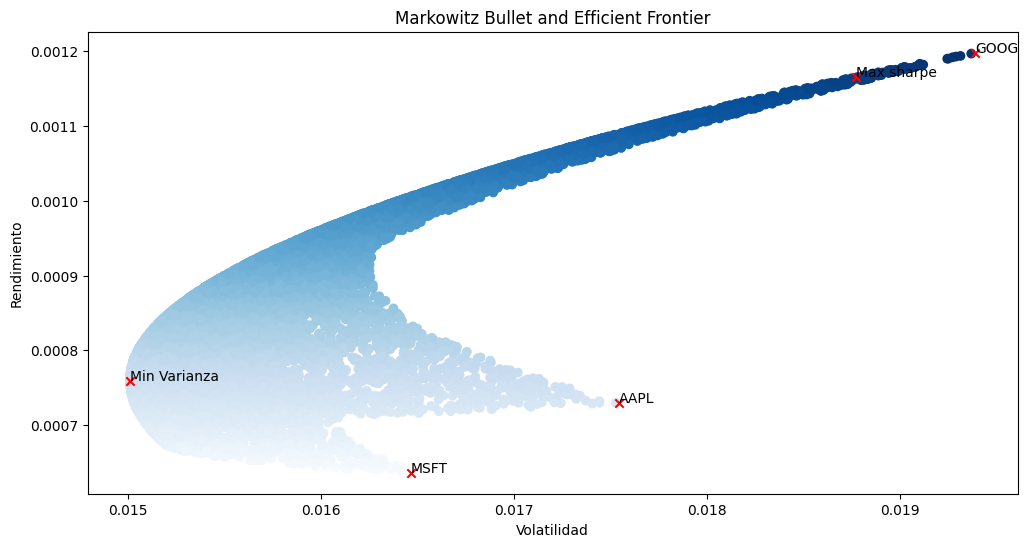

In [60]:
# Realizar grafica
plt.figure(figsize=(12, 6))

# Scatter plot de portafolios aleatorios
plt.scatter(Vol_aleatorio, R_aleatorio, c = R_aleatorio, cmap="Blues")

# Scatter plot de Minima Varianza
plt.scatter(vol_min_var, R_min_var, c = "red", marker="x")
plt.text(vol_min_var, R_min_var, "Min Varianza")
# Scatter plot de Maximo de Sharpe
plt.scatter(vol_max_sharpe, R_max_sharpe, c = "red", marker="x")
plt.text(vol_max_sharpe, R_max_sharpe, "Max sharpe")
# Nombrar eje x, y, titulo
plt.xlabel("Volatilidad")
plt.ylabel("Rendimiento")
plt.title("Markowitz Bullet and Efficient Frontier")
# Graficar coordenadas de activos individuales
mean_ind, vol_ind = returns.mean(), returns.std()

for i in range(len(returns.columns)):
    plt.scatter(vol_ind.iloc[i], mean_ind.iloc[i], c = "red", marker = "x")
    plt.text(vol_ind.iloc[i], mean_ind.iloc[i], returns.columns[i])

### Conclusiones

> Los portafolios óptimos representan el **"mejor" portafolio (combinación de activos / ponderaciones) para un conjunto de activos financieros según una métrica específica**. Estos portafolios ofrecen una visión clara sobre cómo asignar el capital de manera sistemática dado un objetivo concreto.

> Aunque invertir en estos portafolios aumenta la probabilidad de obtener ganancias, es crucial tener en cuenta que estos cálculos están basados en datos históricos. La teoría de portafolios asume que las correlaciones, rendimientos y volatilidades del pasado se mantendrán constantes en el futuro, lo cual a veces no sucede: "**rendimientos pasados no aseguran rendimientos futuros**". Hay que considerar también que la inversión en portafolios, a diferencia del *trading*, es a largo plazo. 

> A pesar de esto, **el uso de metodologías cuantitativas ofrece una mejora sustancial sobre la asignación de activos basada en la intuición o el "feeling"**. La asignación *aleatoria de capital* sin un análisis cuantitativo adecuado tiende a ser ineficiente, y a menudo lleva a una sobreexposición a riesgos y sesgos cognitivos.

> Al aplicar un enfoque estructurado y basado en datos para la selección de portafolios, los inversores pueden **tomar decisiones más informadas y sistemáticas**, lo que resulta en una gestión del riesgo más adecuada y una mayor probabilidad de alcanzar sus objetivos financieros a largo plazo.




##   Tarea 4. 

Realiza un análisis para un portafolio compuesto por los siguientes activos: **LLY (Eli Lilly), NVDA (NVIDIA), MSFT (Microsoft) y KXI (iShares Global Consumer Staples ETF)**. Completa los siguientes puntos.

---

### 1. Investigación de los Activos

Realiza un breve resumen de los activos, describiendo su giro de negocio, sector y productos o servicios.


---

### 2. Cálculo de Rendimientos y Volatilidad de Activos

Descarga los **precios de cierre ajustado** para los activos desde el `2018-01-01` hasta el `2024-09-25`, calcula los **rendimientos diarios**, así como el **rendimiento promedio**, la **volatilidad** de cada activo y la **matriz de covarianza**.

---

### 3. Portafolio Eficiente en Mínima Varianza

Utilizando la matriz de covarianza de los activos, optimiza los pesos para obtener el **portafolio de mínima varianza**. Calcula su rendimiento y volatilidad.

---

### 4. Portafolio Eficiente en Máximo Sharpe

Obtén el portafolio que **maximiza el ratio de Sharpe**, calcula su rendimiento y volatilidad. Asume una tasa libre de riesgo del $3\%$ anual.


---

### 5. Portafolio Equitativamente Ponderado


Asume otro portafolio equitativamente ponderado (todos los activos con el mismo peso), y calcula su rendimiento promedio y su volatilidad.

---

### 6. Gráfica de la Frontera Eficiente

    
Grafica la **frontera eficiente** en términos de media-varianza, junto con los portafolios eficientes, el portafolio equitativamente ponderado y los activos individuales.

---

### 7. Conclusión

    
Compara las métricas de rendimiento y volatilidad de los tres portafolios: 
1. Portafolio de mínima varianza
2. Portafolio de máximo Sharpe
3. Portafolio equitativamente ponderado

Responde:

- ¿Cuál de estos portafolios es superior en términos de riesgo?    


- ¿Cuál de estos portafolios es superior en términos de riesgo y retorno?   


- Interpreta la frontera eficiente en base a la teoría vista en clase y responde: ¿Qué pasa con el portafolio *equally weighted*?¿Es óptimo?¿Por qué?  


- ¿Por qué un portafolio podría ser mejor que otro? ¿De qué depende que sea "mejor"?    


- Analiza las ponderaciones obtenidas por el método de mínima varianza y el de máximo de Sharpe para cada activo de manera individual, basándote en la descripción presentada en la primera sección de la tarea. ¿Qué factores explican que cada activo tenga una mayor o menor ponderación en uno de los métodos en comparación con el otro?


- Concluye acerca de las ventajas y desventajas de una estrategia cuantitativa de asignación de activos frente a una basada en "feeling" o intuición.
